# Import Libraries Required

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Data Exploration

## Load the Dataset

In [3]:
mobile_data = pd.read_csv('Mobile Data.csv')

## Head and Tail of Dataset

In [4]:
mobile_data.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [5]:
mobile_data.tail()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


## Shape of Dataset

In [6]:
mobile_data.shape

(541, 12)

## Dimention of Dataset

In [7]:
mobile_data.ndim

2

## Information of Dataset

In [8]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


## Summary of Numerical columns in Dataset

In [9]:
mobile_data.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000




## Columns in Dataset

In [10]:
mobile_data.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

## Drop unnecessary columns

In [11]:
mobile_data.drop('Unnamed: 0',axis = 1, inplace=True)

In [12]:
# Samples of data
mobile_data.sample(4)

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
78,REDMI 11 Prime,Flashy Black,64,4,5000,50MP,8MP,0,16.71,Helio G99,"9,999"
143,REDMI Note 12,Sunrise Gold,64,6,5000,50MP,13MP,0,16.94,Snapdragon 685,"14,999"
508,realme Narzo 50A,Oxygen Green,128,4,6000,50MP,8MP,0,16.51,MediaTek Helio G85,"11,762"
188,POCO M4 Pro,Cool Blue,128,8,5000,64MP,16MP,0,16.33,Mediatek Helio G96,"13,999"


# Data Preprocessing:

## Rename the column Names

In [13]:
mobile_data.rename(columns={'Battery_':'mAH of Battery','Rear Camera':'Rear Camera(In MP)','Front Camera':'Front Camera(In MP)','Processor_':'Processor in Phone','Prize':'Price of Phone'},inplace=True)

In [14]:
#New columns in datset
mobile_data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'mAH of Battery',
       'Rear Camera(In MP)', 'Front Camera(In MP)', 'AI Lens', 'Mobile Height',
       'Processor in Phone', 'Price of Phone'],
      dtype='object')

### Extract MP from Both the columns of camera as it will create problem in model training

In [15]:
# Make function to extract integer from mixed value
import re
def int_extracter(x):
    return re.search('\d+',x).group()

### Apply function to Rear Camera columns usning lambda function

In [16]:
mobile_data['Rear Camera(In MP)'] = mobile_data['Rear Camera(In MP)'].apply(lambda x:int_extracter(x))

### Apply function to Front Camera columns usning lambda function

In [17]:
mobile_data['Front Camera(In MP)'] = mobile_data['Front Camera(In MP)'].apply(lambda x:int_extracter(x))

In [18]:
mobile_data.sample(4)

,Model,Colour,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Processor in Phone,Price of Phone
533,SAMSUNG Galaxy A13,Peach,128,6,5000,50,8,0,16.76,Exynos Octa Core,"16,499"
216,MOTOROLA g31,Baby Blue,128,6,5000,50,13,0,16.26,Mediatek Helio G85,"12,999"
450,realme X3 SuperZoom,Glacier Blue,256,3,4200,64,16,0,16.69,Qualcomm Snapdragon 855,"17,999"
9,Infinix HOT 30i,Mirror Black,64,4,5000,50,5,1,16.76,G37,"7,999"


## Convert data type of Both Camera columns and Price column by numerical

In [19]:
# Also remove comma from prices
mobile_data['Price of Phone'] = mobile_data['Price of Phone'].str.replace(',', '').astype(float)

In [20]:
mobile_data['Rear Camera(In MP)'] = mobile_data['Rear Camera(In MP)'].astype(int)
mobile_data['Front Camera(In MP)'] = mobile_data['Front Camera(In MP)'].astype(int)

In [21]:
# Describe the data
mobile_data.describe()

,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Price of Phone
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,46.110906,11.992606,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,31.260416,9.053746,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,13.000000,5.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,50.000000,8.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,50.000000,16.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,200.000000,60.000000,1.000000,41.940000,80999.000000


## Check Null values

In [22]:
mobile_data.isnull().sum()

Model                  0
Colour                 0
Memory                 0
RAM                    0
mAH of Battery         0
Rear Camera(In MP)     0
Front Camera(In MP)    0
AI Lens                0
Mobile Height          0
Processor in Phone     0
Price of Phone         0
dtype: int64

No Null Values are there in dataset

In [23]:
# Check data types information
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                541 non-null    object 
 1   Colour               541 non-null    object 
 2   Memory               541 non-null    int64  
 3   RAM                  541 non-null    int64  
 4   mAH of Battery       541 non-null    int64  
 5   Rear Camera(In MP)   541 non-null    int32  
 6   Front Camera(In MP)  541 non-null    int32  
 7   AI Lens              541 non-null    int64  
 8   Mobile Height        541 non-null    float64
 9   Processor in Phone   541 non-null    object 
 10  Price of Phone       541 non-null    float64
dtypes: float64(2), int32(2), int64(4), object(3)
memory usage: 42.4+ KB


## Check outliers

<AxesSubplot:ylabel='Price of Phone'>

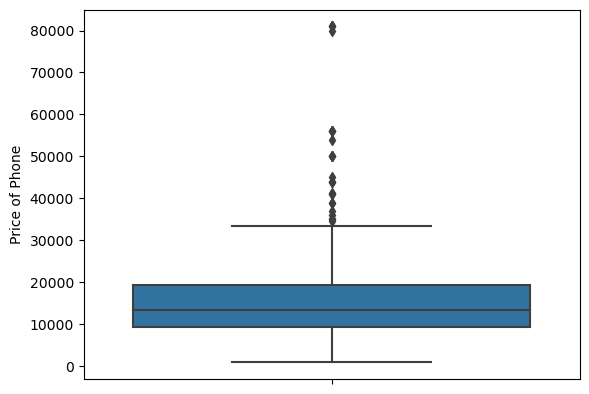

In [24]:
sns.boxplot(data = mobile_data,y = 'Price of Phone')

### Make function to Handle outliers in column with IQR method by capping

In [25]:
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [26]:
# Make variables for lower and upper limit
lower_limit_iqr,upper_limit_iqr = iqr_technique(mobile_data['Price of Phone'])

In [27]:
# Cap the outliers
mobile_data['Price of Phone'] = np.where(mobile_data['Price of Phone']>upper_limit_iqr,upper_limit_iqr,np.where(mobile_data['Price of Phone']<lower_limit_iqr,lower_limit_iqr,mobile_data['Price of Phone']))

## Box plot of price after handling outliers

<AxesSubplot:ylabel='Price of Phone'>

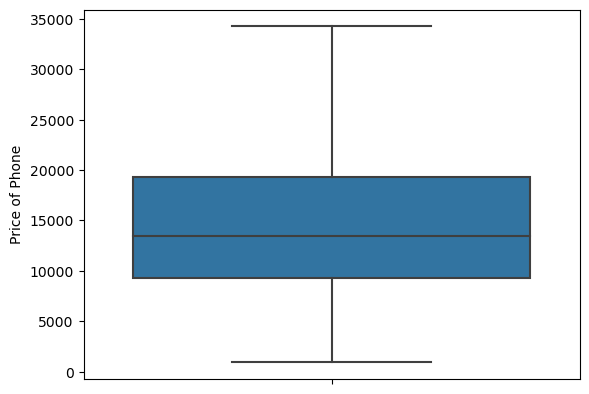

In [28]:
sns.boxplot(data = mobile_data,y = 'Price of Phone')

## Check duplicate Values in Dataset and remove them

In [29]:
print("\nDuplicate Rows:")
print(mobile_data[mobile_data.duplicated()])


Duplicate Rows:
                     Model          Colour  Memory  RAM  mAH of Battery  \
27             vivo T2x 5G     Marine Blue     128    6            5000   
48            MOTOROLA e32     Arctic Blue      64    4            5000   
91   SAMSUNG Galaxy F14 5G   B.A.E. Purple     128    4            6000   
132  SAMSUNG Galaxy F14 5G       OMG Black     128    6            6000   
247              redmi min             M3)      16    4            1000   
344         Tecno Spark 9T  Turquoise Cyan      64    4            5000   
352         POCO X4 Pro 5G     Laser Black     128    8            5000   
424            realme C30s    Stripe Black      64    4            5000   
437           vivo Y100 5G    Pacific Blue     128    8            4500   
480               POCO C31      Royal Blue      64    4            5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
27                   50                    8        0          16.71   
48           

In [30]:
# Drop Duplicates
mobile_data.drop_duplicates(inplace=True)

## Visualize the relation between Phone price and AI Lens

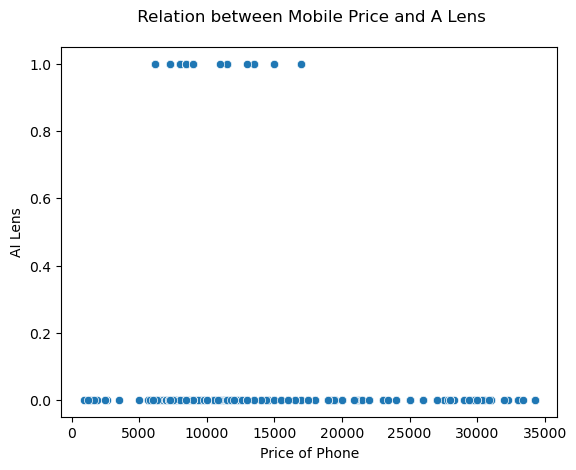

In [31]:
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y= 'AI Lens')
plt.title(' Relation between Mobile Price and A Lens\n')
plt.show()

There is no meaningful information in AI Lens Feature

## Visualize the relation between Phone price and Mobile Height

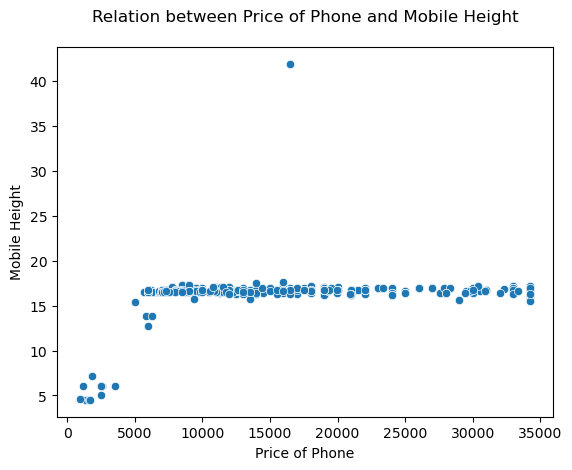

In [32]:
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y= 'Mobile Height')
plt.title('Relation between Price of Phone and Mobile Height\n')
plt.show()

There is no meaningful information in Mobile Height Feature

# Feature Extraction

## Remove AI Lens and Mobile hight columns as these features are not affecting the price of Mobile

In [33]:
mobile_data.drop(['AI Lens','Mobile Height'],axis = 1, inplace=True)

In [34]:
#Head of encoded Data
mobile_data.head()

,Model,Colour,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Processor in Phone,Price of Phone
0,Infinix SMART 7,Night Black,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32,2,5000,8,5,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,G37,8999.0


# Feature Creation

In [35]:
# Make a feature for Camera Quality index by adding both the camera's
def concat_colums(x,y):
    if x>0 and y>0:
        return str(x) + '+' + str(y)
    elif x==0 and y>0 :
        return str(y)
    elif x>0 and y == 0:
        return str(x)
    else:
        return str(0)
concat_colums(0,0)    

'0'

In [36]:
# Apply function in dataset to add new feature
mobile_data['Camera quality index (Front + Rear specs in MP)'] = mobile_data.apply(lambda x: concat_colums(x['Front Camera(In MP)'],x['Rear Camera(In MP)']),axis = 1)

In [37]:
# Make a feature for Phone Storage by adding both memory columns
mobile_data['Phone storage(RAM +ROM in GB)'] = mobile_data.apply(lambda x: concat_colums(x['RAM'],x['Memory']),axis = 1)

In [38]:
# Values counts of Phone storage
mobile_data['Phone storage(RAM +ROM in GB)'].value_counts()

4+64     128
8+128    112
6+128    100
4+128     41
8+256     40
3+32      29
2+32      22
6+64      15
2+64      11
3+64       9
4+256      8
6+256      4
2+16       2
8+64       2
4+16       2
2+256      2
3+256      1
4+32       1
8+16       1
3+128      1
Name: Phone storage(RAM +ROM in GB), dtype: int64

In [39]:
# Values counts of Camara Quality index
mobile_data['Camera quality index (Front + Rear specs in MP)'].value_counts()

8+50      91
16+50     82
5+8       50
5+13      45
5+50      38
16+64     35
16+108    25
13+50     25
13+48     18
8+13      17
32+50     12
8+64      11
16+48     10
0          9
2          6
16+200     6
12+12      5
32+64      5
13+64      4
50+64      4
2+5        3
50+50      3
32+108     3
8+48       2
16+32      2
60+108     2
60+200     2
44+50      2
16+40      2
8+12       2
8+108      1
8+16       1
8+8        1
10+50      1
32+48      1
32+12      1
20+12      1
20+64      1
10+12      1
12+50      1
Name: Camera quality index (Front + Rear specs in MP), dtype: int64

In [40]:
# Head of Data now after feature engineering
mobile_data.head()

,Model,Colour,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Processor in Phone,Price of Phone,Camera quality index (Front + Rear specs in MP),Phone storage(RAM +ROM in GB)
0,Infinix SMART 7,Night Black,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0,5+13,4+64
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0,5+13,4+64
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,Qualcomm Snapdragon 680,11999.0,16+50,8+128
3,POCO C50,Royal Blue,32,2,5000,8,5,Mediatek Helio A22,5649.0,5+8,2+32
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,G37,8999.0,5+50,8+128


## Save final dataset to system

In [41]:
mobile_data.to_csv('Final_mobile_data.csv')

## Correlation of standard Mobile data

In [42]:
correlation_matrix = mobile_data.corr(numeric_only=True)

TypeError: corr() got an unexpected keyword argument 'numeric_only'

In [ ]:
correlation_matrix

## Heat map of dataset

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot= True,cmap='coolwarm',fmt=".2f")
plt.title('Heat map of Actual Data\n')
plt.show()

## Convert categorical variables in to numerical variables using one-hot encoding

In [43]:
categorical_cols = ['Model', 'Colour', 'Processor in Phone','Phone storage(RAM +ROM in GB)','Camera quality index (Front + Rear specs in MP)']
encoded_mobile_data = pd.get_dummies(mobile_data,columns=categorical_cols,drop_first=True,dtype=int)

In [44]:
encoded_mobile_data

,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Price of Phone,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,...,Camera quality index (Front + Rear specs in MP)_60+108,Camera quality index (Front + Rear specs in MP)_60+200,Camera quality index (Front + Rear specs in MP)_8+108,Camera quality index (Front + Rear specs in MP)_8+12,Camera quality index (Front + Rear specs in MP)_8+13,Camera quality index (Front + Rear specs in MP)_8+16,Camera quality index (Front + Rear specs in MP)_8+48,Camera quality index (Front + Rear specs in MP)_8+50,Camera quality index (Front + Rear specs in MP)_8+64,Camera quality index (Front + Rear specs in MP)_8+8
0,64,4,6000,13,5,7299.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64,4,6000,13,5,7299.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,128,8,5000,50,16,11999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,2,5000,8,5,5649.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,8,5000,50,5,8999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,50,12,34265.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,32,2,3100,5,2,5998.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,64,4,5000,50,8,9990.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
539,128,8,5000,50,32,34265.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

#### Break data in Feature and target

In [45]:
x = encoded_mobile_data.drop('Price of Phone',axis = 1)
y = encoded_mobile_data['Price of Phone']

#### Split the dataset into training and testing sets

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [47]:
# Head of x_train
x_train.head()

,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,...,Camera quality index (Front + Rear specs in MP)_60+108,Camera quality index (Front + Rear specs in MP)_60+200,Camera quality index (Front + Rear specs in MP)_8+108,Camera quality index (Front + Rear specs in MP)_8+12,Camera quality index (Front + Rear specs in MP)_8+13,Camera quality index (Front + Rear specs in MP)_8+16,Camera quality index (Front + Rear specs in MP)_8+48,Camera quality index (Front + Rear specs in MP)_8+50,Camera quality index (Front + Rear specs in MP)_8+64,Camera quality index (Front + Rear specs in MP)_8+8
409,128,8,4050,50,44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55,128,6,4500,32,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,64,4,5000,50,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,64,4,5000,13,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,256,8,4400,50,32,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling of features dataset as some features have higher values

In [48]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
x_train_scaled

array([[ 0.27821777,  1.30102845, -1.13253797, ..., -0.46732302,
        -0.16320044, -0.04862166],
       [ 0.27821777,  0.29531092, -0.52436805, ..., -0.46732302,
        -0.16320044, -0.04862166],
       [-0.77975831, -0.7104066 ,  0.1513763 , ..., -0.46732302,
        -0.16320044, -0.04862166],
       ...,
       [-0.77975831, -0.7104066 ,  1.502865  , ..., -0.46732302,
        -0.16320044, -0.04862166],
       [-0.77975831, -0.7104066 ,  1.502865  , ..., -0.46732302,
        -0.16320044, -0.04862166],
       [ 0.27821777,  1.30102845,  0.1513763 , ..., -0.46732302,
        -0.16320044, -0.04862166]])

### First Develop Machine learning Model with linear regression

In [50]:
# Make object of Model
lr_model = LinearRegression()

In [51]:
# Fit the training dataset in object of model
lr_model.fit(x_train_scaled,y_train)

LinearRegression()

In [52]:
# Predict the test Data with Model
y_prediction = lr_model.predict(x_test_scaled)

In [53]:
# Score of model
lr_model.score(x_test_scaled,y_test)

-4.01290823669841e+26

This model is giving negative score so we will check it with another model

In [54]:
# Mean Absolute Error
mae1 = mean_absolute_error(y_test, y_prediction)
mae1

9.416928851149384e+16

In [55]:
# Root Mean Square Score
rmse1 = mean_squared_error(y_test, y_prediction, squared=False)
rmse1

1.6253349394808022e+17

In [56]:
# R2 score
r2_ = r2_score(y_test, y_prediction)
r2_

-4.01290823669841e+26

### Now Develop Machine learning Model with Random Forest

In [57]:
# Make object of model
rf_model = RandomForestRegressor()

In [58]:
# Fit the training dataset in object of model
rf_model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [59]:
# Predict the test Data with Model
y_pred = rf_model.predict(x_test_scaled)

In [60]:
# Score of model
rf_model.score(x_test_scaled,y_test)

0.8795224629042373

### Evaluate the model

In [61]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

In [62]:
# Root Mean Square Score
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [63]:
mae

1478.9809345794395

In [64]:
rmse

2816.2181774925134

In [65]:
# R2 score
r2 = r2_score(y_test, y_pred)

In [66]:
r2

0.8795224629042373

In [67]:
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean R2 score Error:", r2)

Mean Absolute Error: 1478.9809345794395
Root Mean Squared Error: 2816.2181774925134
Mean R2 score Error: 0.8795224629042373


This model is giving good R2 score

## Plot of Test target and Predicted target with Random Forest Model

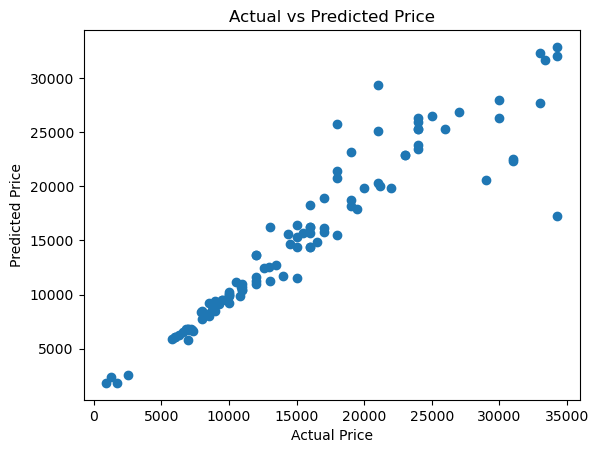

In [68]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

This model is good as it is giving good results with test data and accuracy is also approx more than 89%.

## Plot of Test target and Predicted target with Linear Regression Model

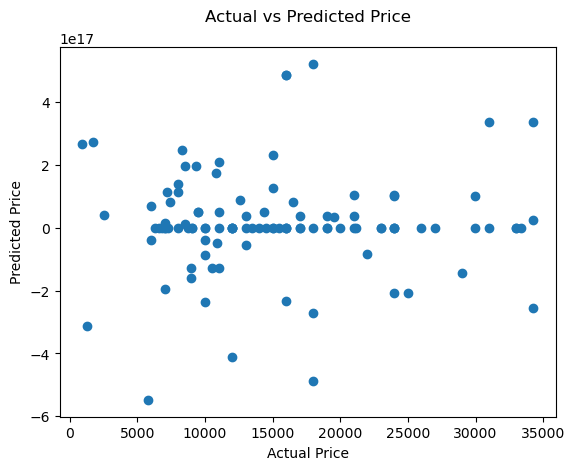

In [69]:
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price\n')
plt.show()

This model is not good enough for this data set.

# Feature Importance Analysis:

In [70]:
# For linear regression, we can analyze the coefficients of the model
feature_importance = pd.DataFrame({'Feature': encoded_mobile_data.drop('Price of Phone',axis = 1).columns, 'Coefficient': lr_model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

                                   Feature   Coefficient
47                      Model_MOTOROLA e40  3.062486e+16
526  Processor in Phone_Mediatek Helio G96  2.901386e+16
237                     Colour_Cosmic grey  2.799237e+16
116               Model_SAMSUNG Galaxy F13  2.736173e+16
54                   Model_MOTOROLA g73 5G  2.695724e+16
..                                     ...           ...
41                      Model_MOTOROLA G32 -2.928438e+16
224                     Colour_Carbon Gray -2.976802e+16
192                    Colour_Alpine White -3.477104e+16
91                         Model_REDMI 12c -4.671983e+16
96                Model_REDMI Note 10 Lite -4.693389e+16

[645 rows x 2 columns]


## Top 20 Most important features

In [71]:
feature_importance.sort_values(by='Coefficient', ascending=False)[0:20]

,Feature,Coefficient
47,Model_MOTOROLA e40,3.062486e+16
526,Processor in Phone_Mediatek Helio G96,2.901386e+16
237,Colour_Cosmic grey,2.799237e+16
116,Model_SAMSUNG Galaxy F13,2.736173e+16
54,Model_MOTOROLA g73 5G,2.695724e+16
577,Processor in Phone_Unisoc Spreadtrum SC9863A1,2.668533e+16
123,Model_SAMSUNG Galaxy Z Flip3 5G,2.598616e+16
168,Model_realme X3 SuperZoom,2.598223e+16
527,Processor in Phone_Mediatek Helio G99,2.561884e+16
550,Processor in Phone_Qualcomm Snapdragon 778G Plus,2.416353e+16


## Feature Importance analysis with Random Forest model

In [72]:
# get the feature importance
feature_importances = rf_model.feature_importances_

In [73]:
# Create a dataframe to visualize the feature importances
feature_importances_df = pd.DataFrame({'Feature': encoded_mobile_data.drop('Price of Phone',axis = 1).columns, "Importance": feature_importances})

In [74]:
# Sort the data by importance in the descending order
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)

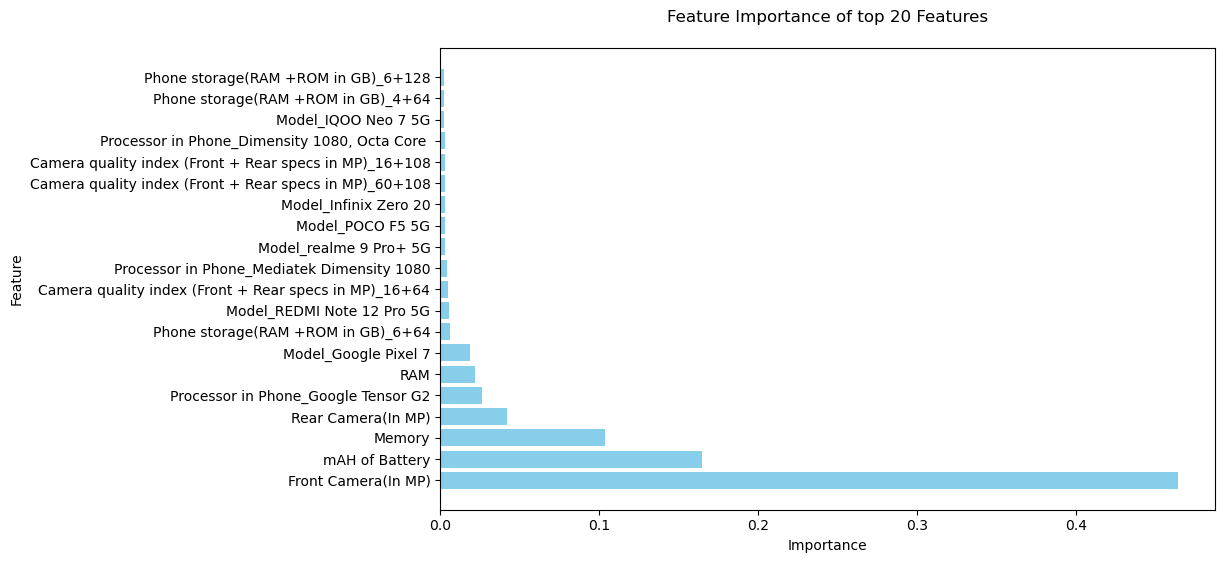

In [75]:
# Plot the feature importance(Top 20 features)
plt.figure(figsize=(10,6))
plt.barh(feature_importances_df['Feature'][0:20], feature_importances_df["Importance"][0:20], color='skyblue')
plt.xlabel('Importance')
plt.ylabel("Feature")
plt.title('Feature Importance of top 20 Features\n')
plt.show()

In [76]:
# Total columns for analysis
mobile_data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'mAH of Battery',
       'Rear Camera(In MP)', 'Front Camera(In MP)', 'Processor in Phone',
       'Price of Phone', 'Camera quality index (Front + Rear specs in MP)',
       'Phone storage(RAM +ROM in GB)'],
      dtype='object')

# Report and Visualization

### Mobile price variation with memory in phone(Bar Plot)

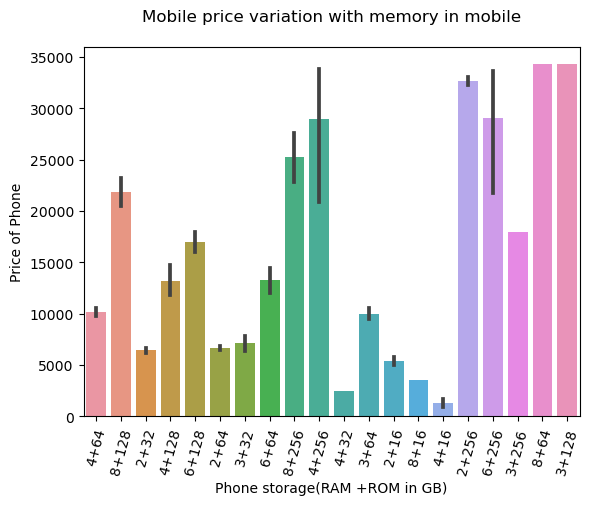

In [77]:
sns.barplot(data = mobile_data,x="Phone storage(RAM +ROM in GB)",y = 'Price of Phone')
plt.xticks(rotation = 75)
plt.title('Mobile price variation with memory in mobile\n')
plt.show()

### Mobile price variation with memory in phone(Scatter Plot)

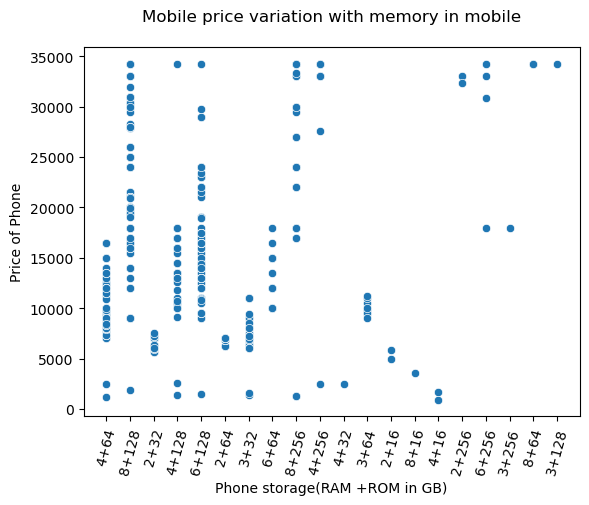

In [78]:
sns.scatterplot(data = mobile_data,x="Phone storage(RAM +ROM in GB)",y = 'Price of Phone')
plt.xticks(rotation = 75)
plt.title('Mobile price variation with memory in mobile\n')
plt.show()

The graph illustrates the relationship between mobile phone prices and their memory capacity (combined RAM and ROM) in gigabytes (GB). Here are the key observations:

General Trend: As memory capacity increases, mobile phone prices tend to rise. This aligns with the common expectation that higher memory configurations come at a premium.

Exceptions: However, there are exceptions. Some phones with relatively lower memory capacities may have higher prices due to other factors such as brand reputation, camera quality, or unique features.

Decision Factors: When choosing a mobile phone, consider your usage needs. If you require more storage for apps, photos, and videos, opting for a higher memory configuration might be worthwhile. On the other hand, if you prioritize budget, a phone with moderate memory could suffice.

### Mobile price variation with camera quality index  in phone(Bar Plot)

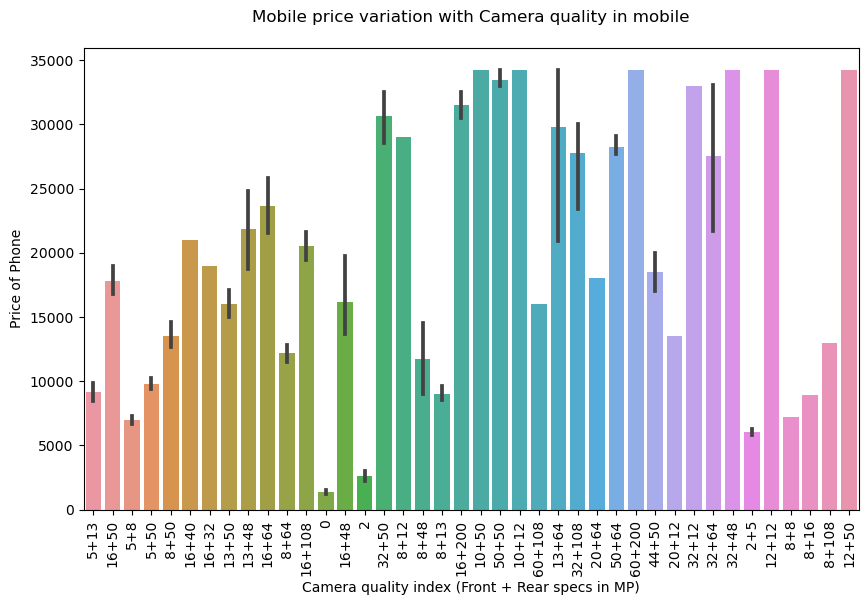

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(data = mobile_data,x="Camera quality index (Front + Rear specs in MP)",y = 'Price of Phone')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Camera quality in mobile\n')
plt.show()

### Mobile price variation with camera quality index  in phone(Scatter Plot)

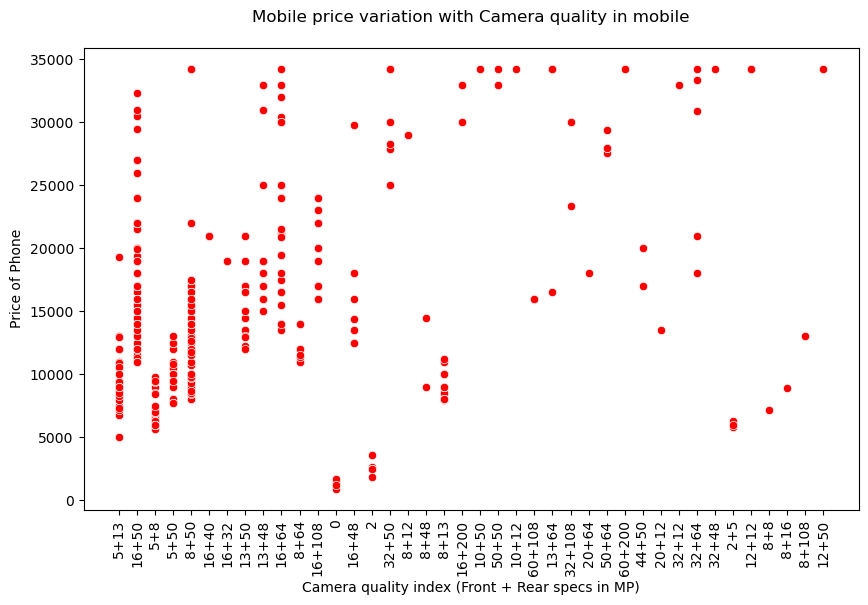

In [80]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = mobile_data,x="Camera quality index (Front + Rear specs in MP)",y = 'Price of Phone',color='red')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Camera quality in mobile\n')
plt.show()

The graph illustrates the relationship between camera quality index (measured in megapixels for both front and rear cameras) and the price of mobile phones. Here are the key takeaways from the graph:

Positive Correlation: Generally, as the camera quality (in megapixels) increases, the price of the mobile phone tends to rise. This suggests that consumers are willing to pay more for better camera specifications.

Variability: While there is a positive trend, there is also significant variability in prices for phones with similar camera quality. Factors such as brand reputation, additional features, and market demand contribute to this variability.

Trade-offs: Consumers may make trade-offs between camera quality and budget. Some may prioritize a higher camera quality, while others may opt for a more affordable phone with slightly lower camera specs.

### Mobile price variation with Battery size

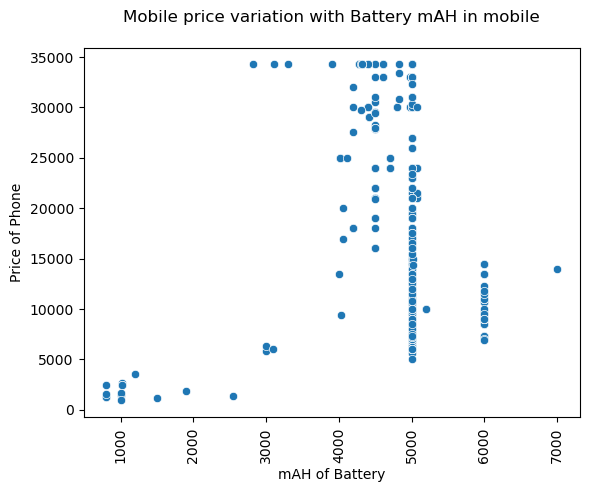

In [81]:
sns.scatterplot(data = mobile_data,x="mAH of Battery",y = 'Price of Phone')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Battery mAH in mobile\n')
plt.show()

The scatter plot graph in the image illustrates the correlation between mobile price and battery capacity (mAh).

Surprisingly, it reveals an interesting pattern: higher battery capacity does not necessarily correlate with a higher price.

The data points are scattered across the graph, suggesting that some phones with lower battery capacities are priced higher than those with larger batteries. 

This unexpected relationship challenges the conventional assumption that more expensive phones always come with larger batteries.

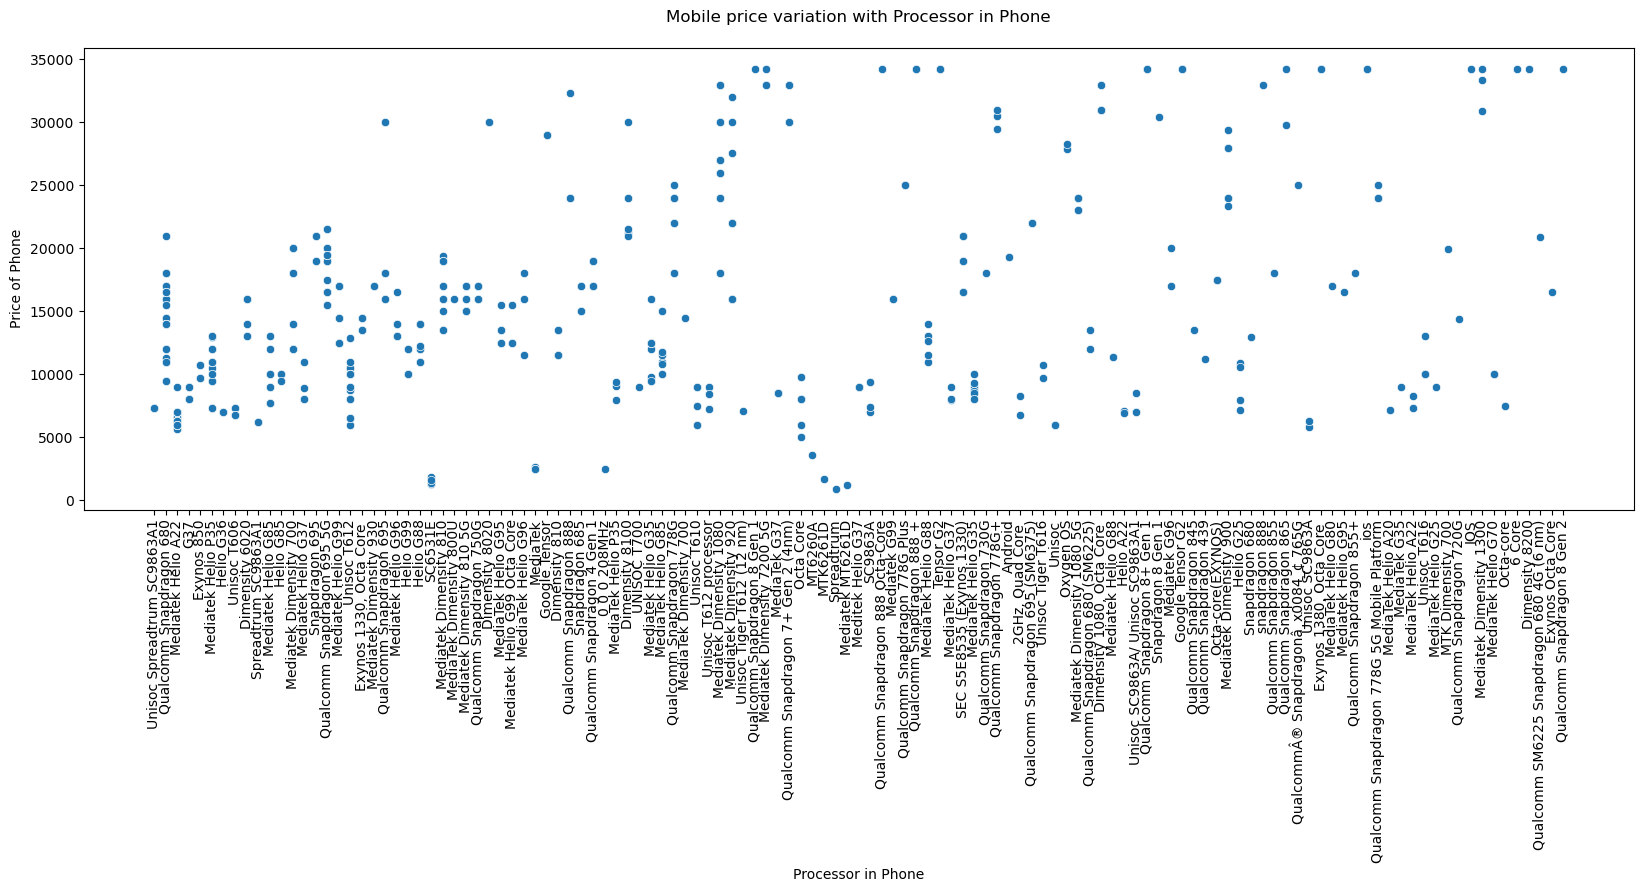

In [82]:
plt.figure(figsize=(20,6))
sns.scatterplot(data = mobile_data,y = 'Price of Phone',x="Processor in Phone")
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Processor in Phone\n')
plt.show()

The graph shows how different mobile phone processors relate to their prices.

As the processor quality or performance increases, we might expect the price of the mobile phone to increase as well.

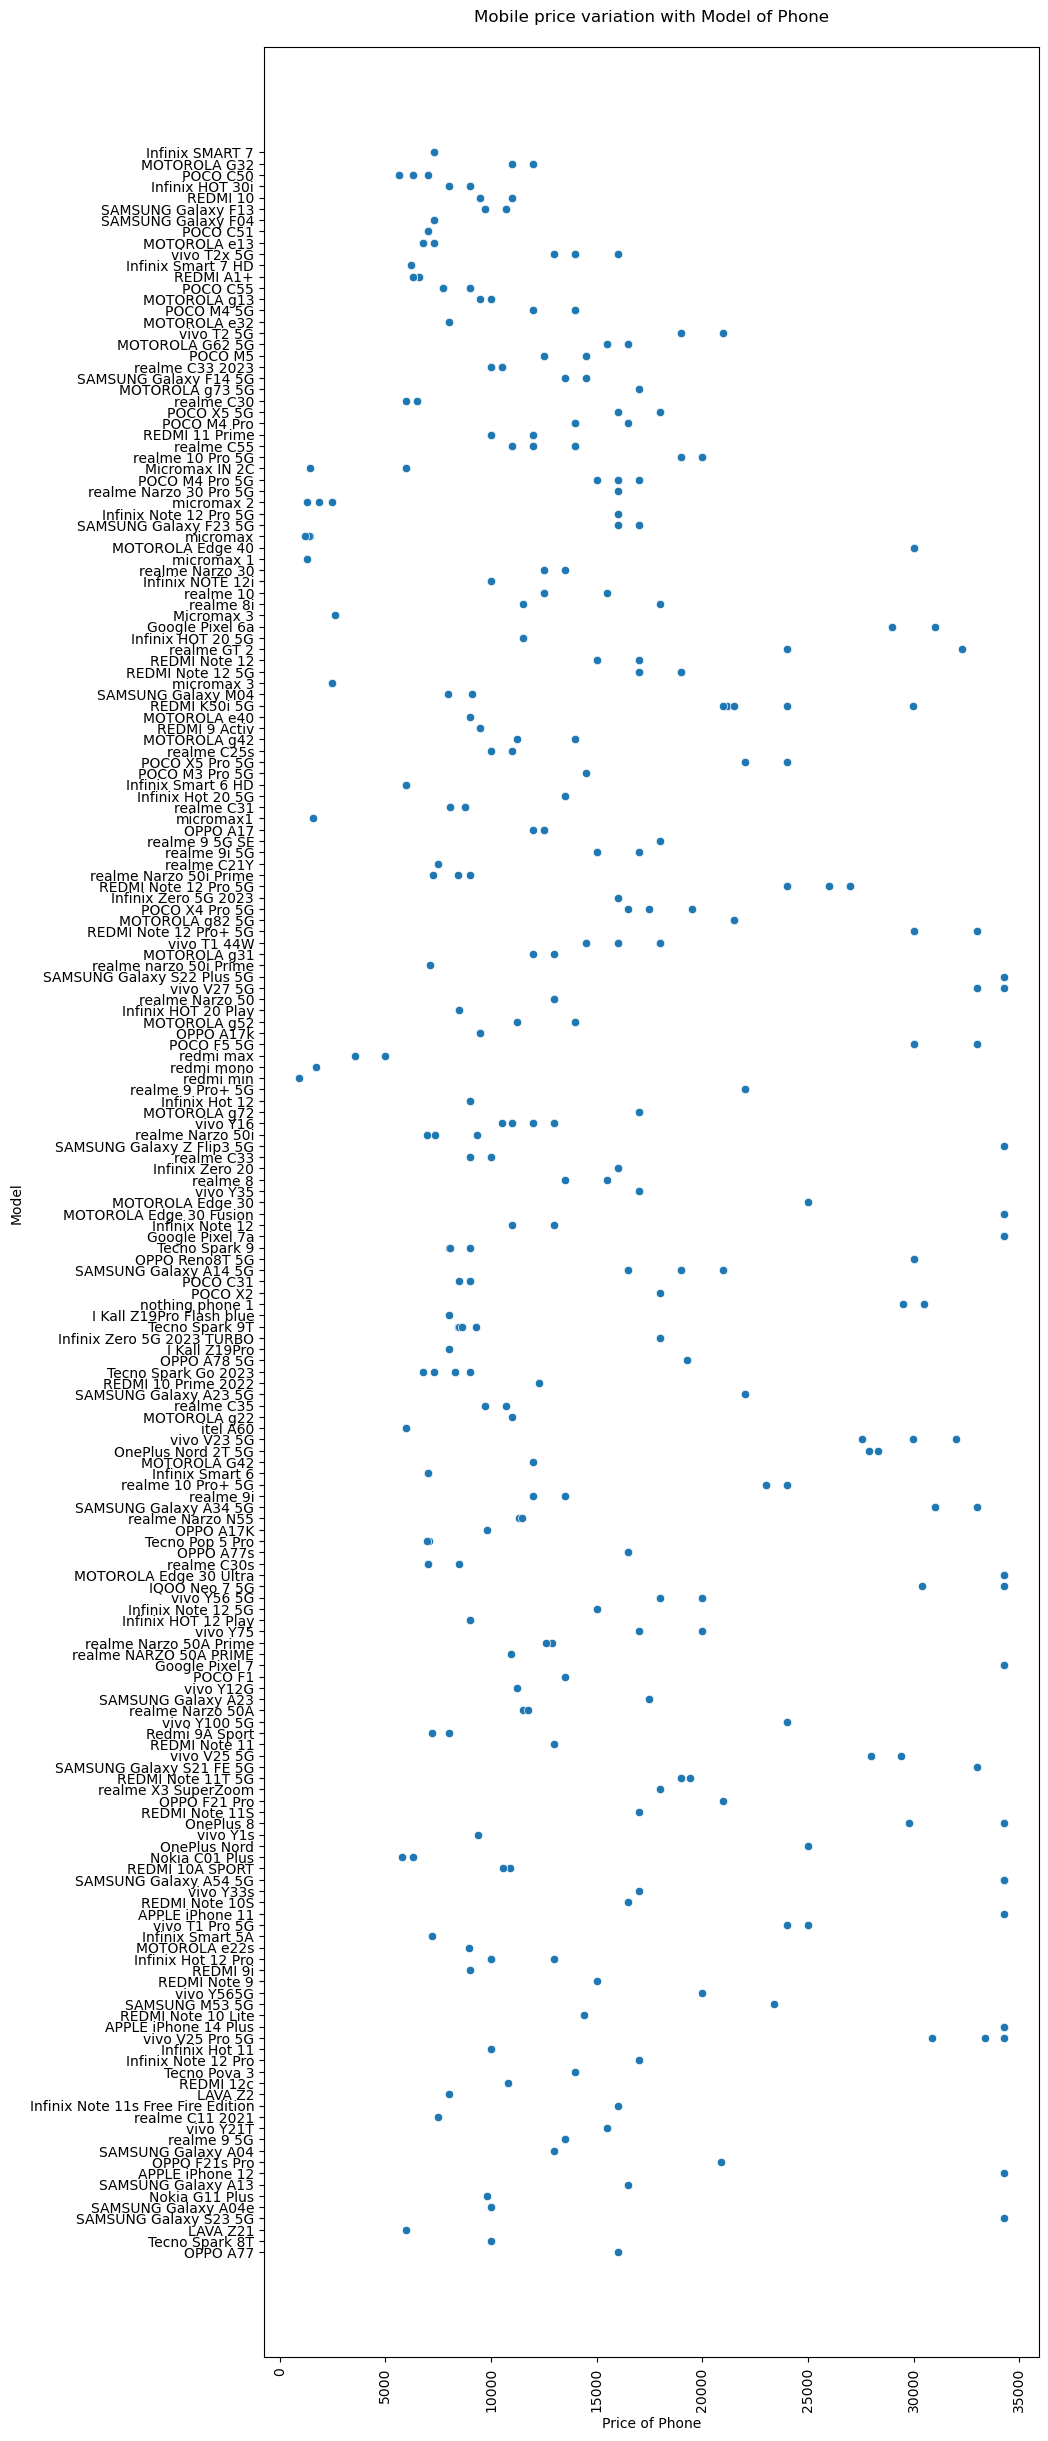

In [83]:
plt.figure(figsize=(10,30))
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y="Model")
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Model of Phone\n')
plt.show()

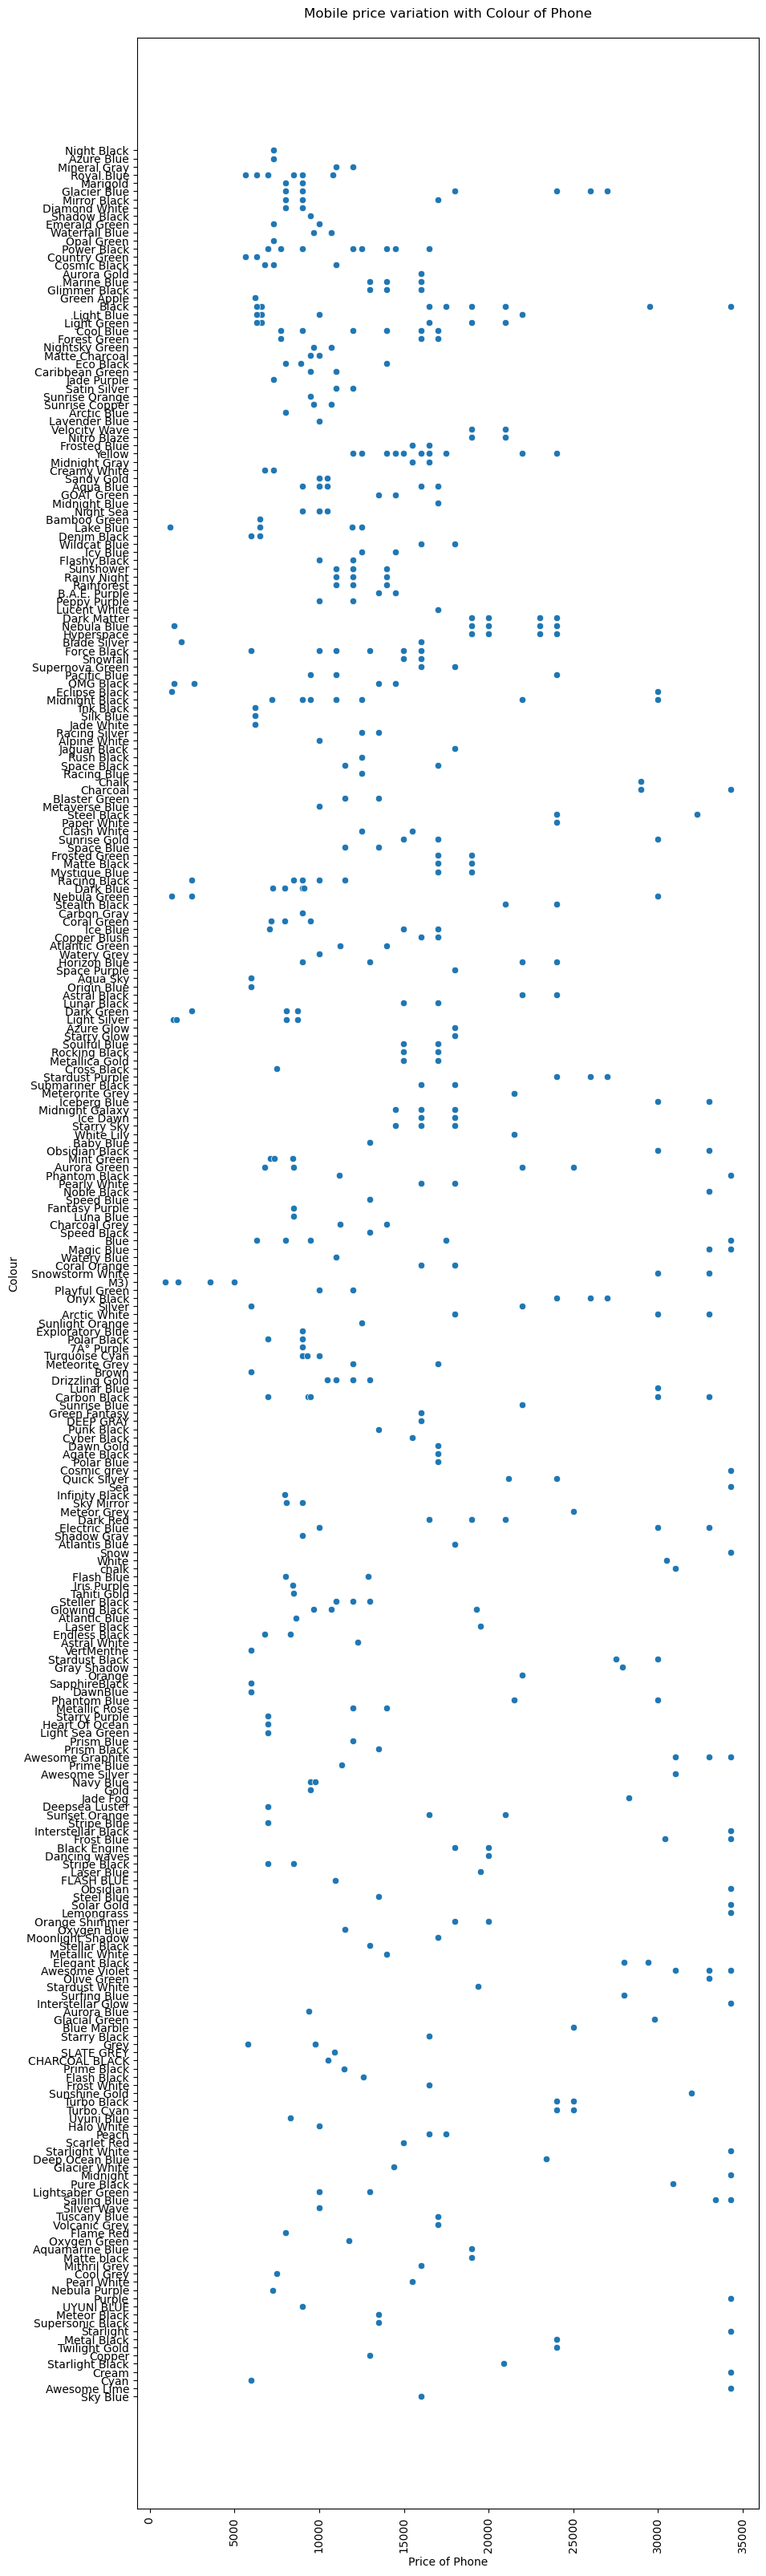

In [84]:
plt.figure(figsize=(10,40))
sns.scatterplot(data = mobile_data,x = 'Price of Phone',y="Colour")
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Colour of Phone\n')
plt.show()